In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
from process_voice import *
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [2]:
wav_dir = "/home/yuanliu/桌面/voice_recog/unlock/unlock_ly"
total_data, total_label = preprocess_data(wav_dir, 1)

[0.30631024 0.8757584  1.         ... 0.9368654  1.         0.8757584 ]


In [5]:
print(np.shape(total_data))
print(np.shape(total_label))

(20, 88064)
(20,)


In [6]:
wav_dir_1 = "/home/yuanliu/桌面/voice_recog/unlock/unlock_wl"
total_data_1, total_label_1 = preprocess_data(wav_dir_1, 0)

0.5

In [6]:
print(np.shape(total_data_1))
print(np.shape(total_label_1))

(20, 88064)
(20,)


In [12]:
np.shape(total_data_1)

(20, 88064)

In [7]:
total_data_all = np.concatenate([total_data, total_data_1], axis=0)
total_label_all = np.concatenate([total_label, total_label_1])

In [14]:
print(np.shape(total_data_all))
print(np.shape(total_label_all))

(40, 88064)
(40,)


In [8]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [9]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(total_data_all)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.3707311153411865 seconds


In [10]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.5767787  0.05611211 0.03039013 0.02949225]


(<Figure size 576x576 with 1 Axes>,
 [Text(-4.968939, 0.2699369, '0'), Text(5.7316246, -1.2630838, '1')])

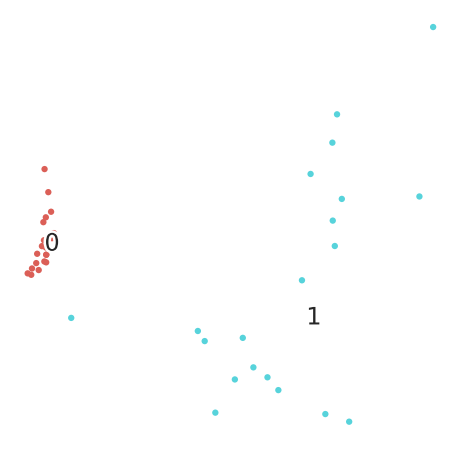

In [12]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,total_label_all) # Visualizing the PCA output

In [14]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(total_data_all)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.449434757232666 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(33.454975, -35.3412, '0'), Text(-44.720463, 52.03828, '1')])

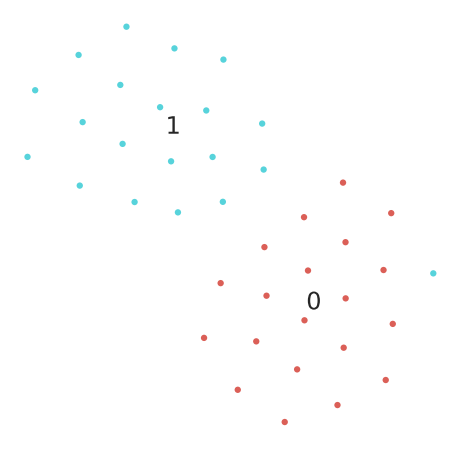

In [15]:
fashion_scatter(fashion_tsne, total_label_all)